<a href="https://colab.research.google.com/github/Alihassoon93/data-science-machine-learning/blob/main/habermanEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
haber = pd.read_csv('/content/drive/My Drive/haberman.csv')

haber

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [ ]:
# haber.size

haber.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [ ]:
haber['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


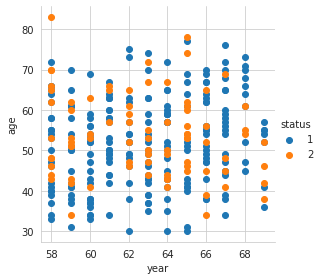

In [ ]:
sns.set_style("whitegrid");
sns.FacetGrid(haber, hue = "status", size= 4) \
   .map(plt.scatter, "year", "age") \
   .add_legend();
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


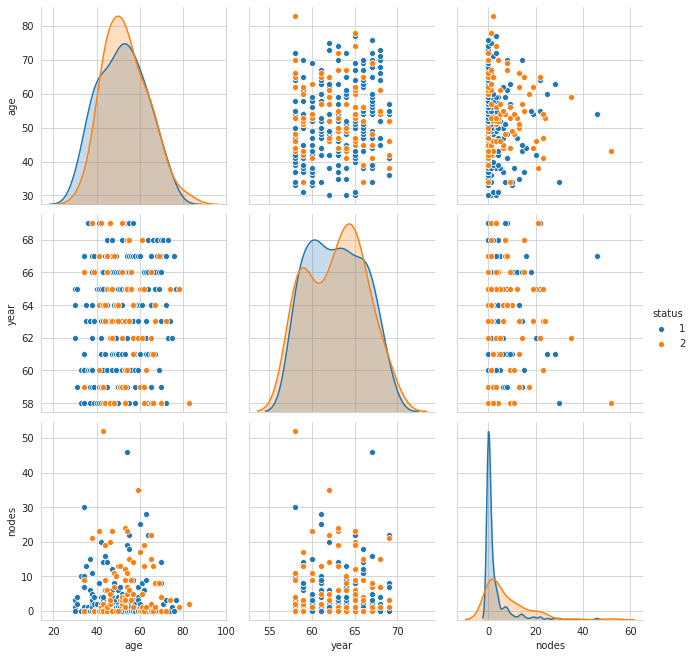

In [ ]:

plt.close()
sns.set_style("whitegrid")
sns.pairplot(haber, hue= "status", size= 3)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


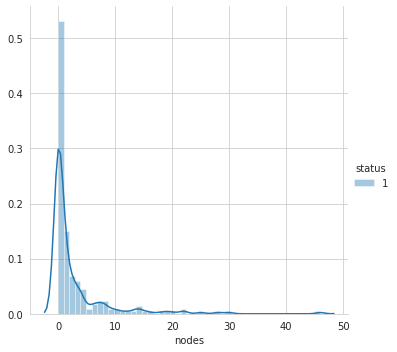

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


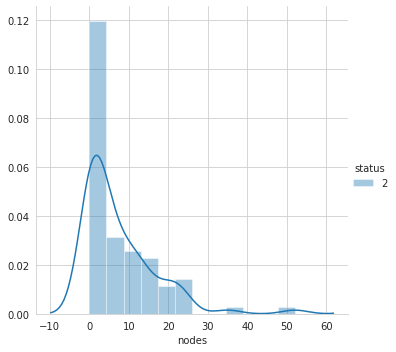

In [ ]:
sns.FacetGrid(haber_lived, hue= "status" , size= 5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.show()

sns.FacetGrid(haber_died, hue= "status" , size= 5) \
   .map(sns.distplot, "nodes") \
   .add_legend()
plt.show()

In [ ]:
haber_lived = haber.loc[haber['status'] == 1 ]
haber_died = haber.loc[haber['status'] == 2 ]

print(haber_lived)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
298   73    68      0       1
300   74    63      0       1
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1

[225 rows x 4 columns]


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


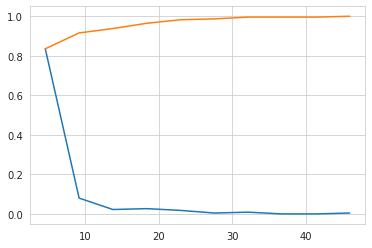

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


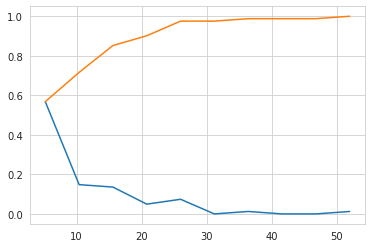

In [ ]:
counts, bin_edges = np.histogram(haber_lived ['nodes'], bins= 10, density= True) 

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()


counts, bin_edges = np.histogram(haber_died ['nodes'], bins= 10, density= True) 

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

In [ ]:
print("\nMedian:")
print(np.median(haber_lived["nodes"]))
print(np.median(haber_died["nodes"]))

print("\nQuantiles:")
print(np.percentile(haber_lived["nodes"], np.arange(0, 100, 25)))
print(np.percentile(haber_died["nodes"], np.arange(0, 100, 25)))

print("\nPercentiles:")
print(np.percentile(haber_lived["nodes"], 90 ))
print(np.percentile(haber_died["nodes"], 90 ))


Median:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Percentiles:
8.0
20.0


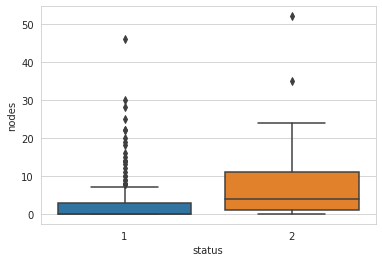

In [ ]:
sns.boxplot(x='status', y='nodes', data= haber)
plt.show()

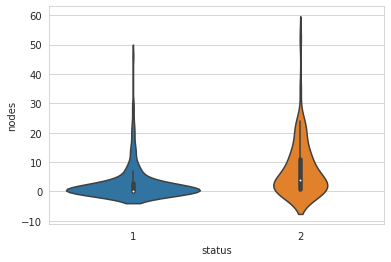

In [ ]:
sns.violinplot(x = 'status', y = 'nodes', data = haber, size = 10)

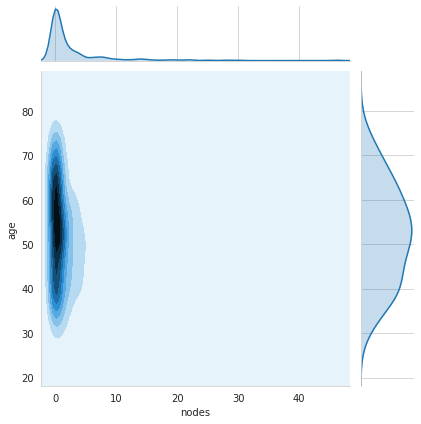

In [ ]:
sns.jointplot(x = "nodes", y = "age", data = haber_lived, kind = "kde")

if the person has 3 or less nodes he have the likelyhood of surviving